In [94]:
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# load data

In [95]:
def load_text(path):
    texts = []
    labels =[]
    with open(path,'r') as file:
        txts = [x.split(';') for x in file.readlines()]
        for text,label in txts:
            texts.append(text)
            labels.append(label.rstrip('\n'))
    return texts,labels

In [96]:
train_path = '../data/emotion/train.txt'
test_path = '../data/emotion/test.txt'
val_path = '../data/emotion/val.txt'

In [97]:
X_train, y_train = load_text(train_path)
X_train

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [98]:
y_train

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

In [99]:
X_val, y_val = load_text(val_path)
X_test, y_test = load_text(test_path)

In [100]:
def preprocess_texts(txts):
    preprocessed_texts = []
    stop_words = set(stopwords.words('english'))
    for txt in txts:
        words = word_tokenize(txt)
        filtered_txt = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]
        txt = ' '.join(filtered_txt)
        preprocessed_texts.append(txt)
    preprocessed_texts = np.array(preprocessed_texts)
    return preprocessed_texts

# EDA

In [101]:
print("No.of Training Examples:",len(X_train))
print("No.of Validation Examples:",len(X_val))
print("No.of Testing Examples:",len(X_test))

No.of Training Examples: 16000
No.of Validation Examples: 2000
No.of Testing Examples: 2000


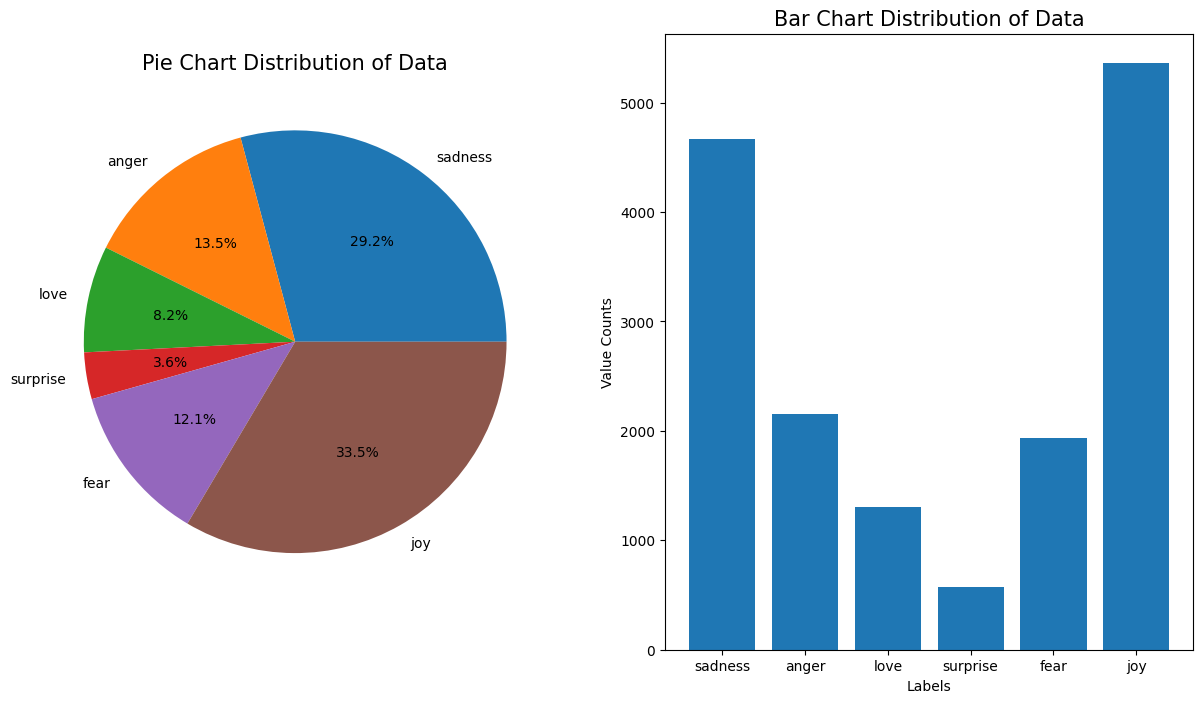

In [102]:
classes_dict = Counter(y_train)
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax[0].pie(classes_dict.values(),labels=classes_dict.keys(),autopct='%.1f%%')
ax[0].set_title("Pie Chart Distribution of Data",fontsize=15)
ax[1].bar(classes_dict.keys(),classes_dict.values())
ax[1].set_title("Bar Chart Distribution of Data",fontsize=15)
ax[1].set_xlabel("Labels")
ax[1].set_ylabel("Value Counts")
plt.show()

# Preprocessing

In [103]:
X_train_p = preprocess_texts(X_train)
X_val_p = preprocess_texts(X_val)
X_test_p = preprocess_texts(X_test)

In [104]:
X_train_p

array(['didnt feel humiliated',
       'go feeling hopeless damned hopeful around someone cares awake',
       'im grabbing minute post feel greedy wrong', ...,
       'feel strong good overall', 'feel like rude comment im glad',
       'know lot feel stupid portray'], dtype='<U232')

# Vectorization

## Bag of words

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
bow_vectorizer = CountVectorizer(max_features=3000, min_df=25)

In [107]:
bow_vectorizer = bow_vectorizer.fit(X_train_p)
X_train_vec = bow_vectorizer.transform(X_train_p)
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
X_train_vec.shape

(16000, 1003)

## TF-IDF

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=25) 

In [112]:
tfidf_vectorizer = tfidf_vectorizer.fit(X_train_p)
X_train_vec_tfidf = tfidf_vectorizer.transform(X_train_p)

In [113]:
X_train_vec_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
X_train_vec_tfidf.shape

(16000, 1003)

# One hot encoding

In [115]:
from sklearn.preprocessing import OneHotEncoder

In [116]:
encoder = OneHotEncoder()

In [117]:
encoder = encoder.fit(np.array(y_train).reshape(-1, 1))

In [118]:
y_train_en = encoder.transform(np.array(y_train).reshape(-1, 1))
y_train_en

<16000x6 sparse matrix of type '<class 'numpy.float64'>'
	with 16000 stored elements in Compressed Sparse Row format>

# Train BOW

In [119]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [120]:
clf = OneVsRestClassifier(LinearSVC(C=1.0))
clf.fit(X_train_vec, y_train_en) 

OneVsRestClassifier(estimator=LinearSVC())

## Predict BOW

In [121]:
from sklearn.metrics import hamming_loss, f1_score

In [122]:
X_val_vec = bow_vectorizer.transform(X_val_p)

In [123]:
predictions = clf.predict(X_val_vec)

In [124]:
predictions.toarray()

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [125]:
y_val_en = encoder.transform(np.array(y_val).reshape(-1, 1))

In [128]:
loss = hamming_loss(y_val_en, predictions)
f1 = f1_score(y_val_en, predictions, average='micro')

In [129]:
print(f"Hamming Loss: {loss}, F1-Score: {f1}")

Hamming Loss: 0.0455, F1-Score: 0.8597842835130971


# Train TFIDF

In [131]:
clf = OneVsRestClassifier(LinearSVC(C=1.0))
clf.fit(X_train_vec_tfidf, y_train_en) 

OneVsRestClassifier(estimator=LinearSVC())

## Predict TFIDF

In [132]:
X_val_vec = tfidf_vectorizer.transform(X_val_p)
predictions = clf.predict(X_val_vec)

In [133]:
loss = hamming_loss(y_val_en, predictions)
f1 = f1_score(y_val_en, predictions, average='micro')

In [134]:
print(f"Hamming Loss: {loss}, F1-Score: {f1}")

Hamming Loss: 0.043, F1-Score: 0.8653444676409185


# Word2vec

In [135]:
from gensim.models import Word2Vec

In [136]:
word2vec = Word2Vec(sentences=X_train_p, vector_size=100, window=5, min_count=1)

In [137]:
vocab_size = len(word2vec.wv)
embedding_dim = word2vec.vector_size

In [138]:
print(vocab_size)
embedding_dim

27


100

In [139]:
def get_sentence_vector(sentence, word2vec_model):
    """Convert sentence to vector by averaging word vectors"""
    vectors = [word2vec.wv[word] for word in sentence 
              if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(word2vec.vector_size)

In [140]:
X_word2vec = np.array([get_sentence_vector(sent, word2vec) 
                  for sent in X_train_p])

In [141]:
X_word2vec

array([[ 0.05413153, -0.08055383,  0.01075072, ...,  0.04691256,
         0.16783637,  0.26388305],
       [ 0.1020891 , -0.12621973,  0.02492548, ...,  0.05380463,
         0.19427145,  0.28120333],
       [ 0.07909059, -0.0784094 ,  0.02689467, ...,  0.10524192,
         0.19768289,  0.2247799 ],
       ...,
       [ 0.08912358, -0.09524783,  0.01478769, ...,  0.02902468,
         0.21485619,  0.25027397],
       [ 0.05584253, -0.05411225,  0.02614416, ...,  0.09016477,
         0.16376384,  0.25173053],
       [ 0.04230447, -0.07293215,  0.01108141, ...,  0.06659384,
         0.19399057,  0.21399568]], dtype=float32)

In [142]:
X_word2vec.shape

(16000, 100)

In [143]:
clf = OneVsRestClassifier(LinearSVC(C=1.0))
clf.fit(X_word2vec, y_train_en) 

OneVsRestClassifier(estimator=LinearSVC())

In [144]:
X_val_word2vec = np.array([get_sentence_vector(sent, word2vec) 
                  for sent in X_val_p])

In [145]:
X_val_word2vec.shape

(2000, 100)

In [146]:
prediction = clf.predict(X_val_word2vec)

In [147]:
loss = hamming_loss(y_val_en, predictions)
f1 = f1_score(y_val_en, predictions, average='micro')

In [148]:
print(f"Hamming Loss: {loss}, F1-Score: {f1}")

Hamming Loss: 0.043, F1-Score: 0.8653444676409185
